##  🚀 Task 3 _ cats and dogs classification 


In [1]:
# Disable warnings in the notebook to maintain clean output cells
import warnings  # Import the warnings module to handle warnings
warnings.filterwarnings('ignore')  # Filter and ignore warnings to maintain clean output

# Import necessary libraries
import numpy as np  # Import numpy library for numerical operations
import pandas as pd  # Import pandas library for data manipulation and analysis
import matplotlib.pyplot as plt  # Import matplotlib library for data visualization
import seaborn as sns  # Import seaborn library for statistical data visualization
import os  # Import os module for interacting with the operating system
import cv2  # Import OpenCV library for computer vision tasks
import zipfile  # Import zipfile module for working with zip files
import random  # Import random module for generating random numbers and sequences
import albumentations  # Import albumentations library for image augmentation
import subprocess  # Import subprocess module for running shell commands
from sklearn.model_selection import train_test_split  # Import train_test_split function from sklearn for splitting dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Import ImageDataGenerator from keras for image data augmentation
from tensorflow.keras.applications import ResNet50V2  # Import ResNet50V2 model from keras for transfer learning
from tensorflow.keras.applications.inception_v3 import InceptionV3  # Import InceptionV3 model from keras for transfer learning
from tensorflow.keras.applications import MobileNetV2  # Import MobileNetV2 model from keras for transfer learning
from tensorflow.keras.models import Model  # Import Model class from keras for defining custom neural network architectures
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input  # Import layers from keras for building neural networks
from tensorflow.keras.optimizers import Adam  # Import Adam optimizer from keras for model optimization
from keras.utils import plot_model  # Import plot_model function from keras for visualizing model architectures
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping  # Import callbacks from keras for adjusting learning rate and early stopping
from tensorflow.keras.applications.resnet_v2 import preprocess_input as resnet_preprocess_input  # Import preprocess_input function from keras for ResNetV2 models
from tensorflow.keras.applications.inception_v3 import preprocess_input as inceptionv3_preprocess_input  # Import preprocess_input function from keras for InceptionV3 models
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenetv2_preprocess_input  # Import preprocess_input function from keras for MobileNetV2 models
from tensorflow.keras.models import load_model  # Import load_model function from keras for loading pre-trained models
from sklearn.svm import SVC  # Import SVC (Support Vector Classifier) from sklearn for machine learning classification
from sklearn.decomposition import PCA  # Import PCA (Principal Component Analysis) from sklearn for dimensionality reduction
from sklearn.metrics import accuracy_score  # Import accuracy_score function from sklearn for evaluating classification accuracy
from joblib import dump  # Import dump function from joblib for saving trained models
from IPython.display import FileLink, display  # Import FileLink and display functions from IPython.display for displaying files

In [2]:

sns.set(rc={'axes.facecolor' : 'gainsboro'},style='darkgrid')

50.0


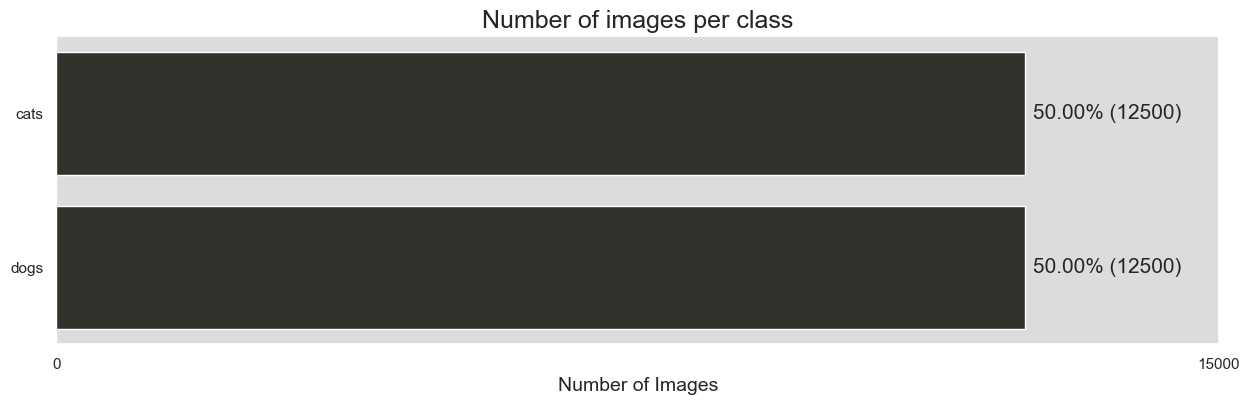

In [4]:
train_path = '../data/train'

filenames = os.listdir(train_path)

cat_images = [filename for filename in filenames if 'cat' in filename]
dog_images = [filename for filename in filenames if 'dog' in filename]


cat_count =len(cat_images)
dog_count =len(dog_images)

total_count = cat_count + dog_count

cat_percentage = ( cat_count / total_count) * 100
dog_percentage = ( dog_count / total_count) * 100

print(cat_percentage)

labels=['cats' , 'dogs']
counts = [cat_count,dog_count]
percentages = [cat_percentage,dog_percentage]

plt.figure(figsize=(15,4))

ax=sns.barplot(y=labels,x=counts,orient='h',color='#33312b')

ax.set_xticks([0,15000])

for i,p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width + 100, p.get_y() + p.get_height()/2.,'{:1.2f}% ({})'.format(percentages[i], counts[i]), va="center", fontsize=15)
    
# Set the x-label for the plot
plt.xlabel('Number of Images', fontsize=14)

# Set the title and show the plot
plt.title("Number of images per class", fontsize=18)
plt.show()

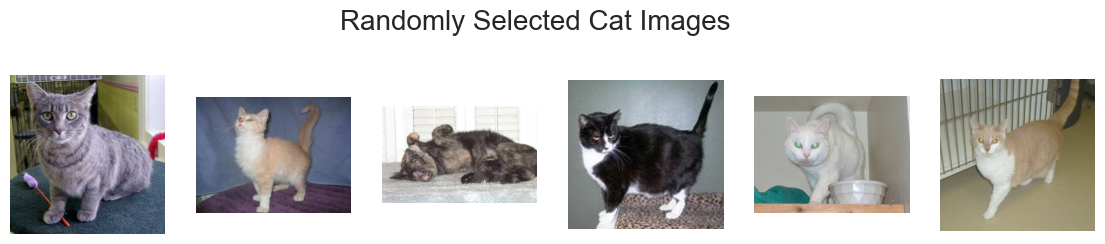

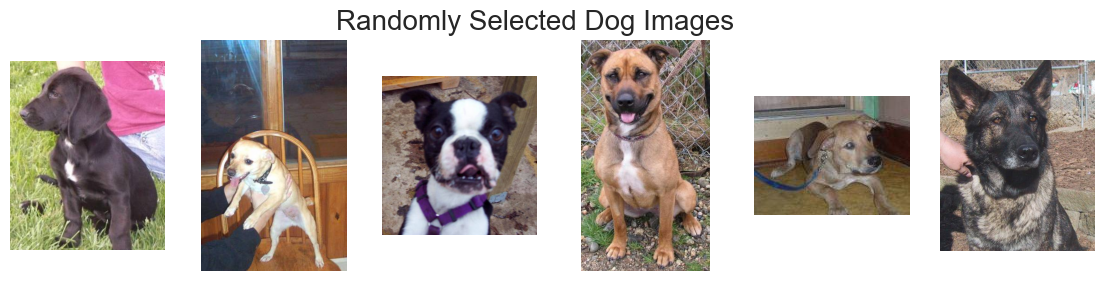

In [4]:
# Setting the random seed for reproducibility
np.random.seed(42)  # Set the random seed to ensure reproducibility of results

# Randomly select 6 images from each category
random_cat_images = np.random.choice(cat_images, 6)  # Randomly select 6 cat images
random_dog_images = np.random.choice(dog_images, 6)  # Randomly select 6 dog images

# Function to plot images
def plot_images(images, title):
    plt.figure(figsize=(14, 3))  # Create a new figure with a specified size
    for i, img_name in enumerate(images):  # Iterate over the selected images
        plt.subplot(1, 6, i+1)  # Create subplots in a row
        img = cv2.imread(os.path.join(train_path, img_name))  # Read the image
        # Convert the BGR image (default in OpenCV) to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
        plt.imshow(img)  # Display the image
        plt.axis('off')  # Turn off axis labels
    plt.suptitle(title, fontsize=20)  # Add a centered title to the plot
    plt.show()  # Show the plot

# Plot the images
plot_images(random_cat_images, "Randomly Selected Cat Images")  # Plot randomly selected cat images
plot_images(random_dog_images, "Randomly Selected Dog Images")  # Plot randomly selected dog images

In [5]:
# Initialize an empty list to store image file paths and their respective labels
data = []

# Append the cat image file paths with label "cat" to the data list
data.extend([(os.path.join(train_path, filename), "cat") for filename in cat_images])

# Append the dog image file paths with label "dog" to the data list
data.extend([(os.path.join(train_path, filename), "dog") for filename in dog_images])

# Convert the collected data into a DataFrame
df = pd.DataFrame(data, columns=['filepath', 'label'])

# Display the first few entries of the DataFrame
df.head()

,filepath,label
0,../data/train\cat.0.jpg,cat
1,../data/train\cat.1.jpg,cat
2,../data/train\cat.10.jpg,cat
3,../data/train\cat.100.jpg,cat
4,../data/train\cat.1000.jpg,cat


In [6]:
del data, cat_images, dog_images

In [7]:
# Split the data into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# Display the shape of the training and validation sets
print("Training data shape:", train_df.shape)
print("Validation data shape:", val_df.shape)

# Deleting the original DataFrame to free up memory
del df

Training data shape: (20000, 2)
Validation data shape: (5000, 2)


In [8]:
# Display the first few rows of the train DataFrame
train_df.head()

,filepath,label
20022,../data/train\dog.5518.jpg,dog
4993,../data/train\cat.3241.jpg,cat
24760,../data/train\dog.9783.jpg,dog
13775,../data/train\dog.11144.jpg,dog
20504,../data/train\dog.5952.jpg,dog


In [9]:

def create_data_generators(preprocessing_function=None, batch_size=32, image_dimensions=(224, 224)):
    """
    Creates and returns training and validation data generators with optional weather effects and preprocessing.
    
    Parameters:
    - preprocessing_function (function, optional): Preprocessing function specific to a model. Defaults to None.
    - batch_size (int, optional): Number of images per batch for the generators. Defaults to 32.
    - image_dimensions (tuple, optional): Dimensions to which the images will be resized (height, width). Defaults to (224, 224).
    
    Returns:
    - train_generator (ImageDataGenerator): Generator for training data with augmentations.
    - val_generator (ImageDataGenerator): Generator for validation data without augmentations.
    
    Notes:
    - The training generator uses augmentations.
    - The validation generator does not use any augmentations.
    - If provided, the preprocessing function is applied to both generators.
    """

    # Define our training data generator with specific augmentations
    train_datagen = ImageDataGenerator(
        rotation_range=15,                             # Randomly rotate the images by up to 15 degrees
        width_shift_range=0.15,                        # Randomly shift images horizontally by up to 15% of the width
        height_shift_range=0.15,                       # Randomly shift images vertically by up to 15% of the height
        zoom_range=0.15,                               # Randomly zoom in or out by up to 15%
        horizontal_flip=True,                          # Randomly flip images horizontally
        vertical_flip=False,                           # Do not flip images vertically as it doesn't make sense in our context
        shear_range=0.02,                              # Apply slight shear transformations
        preprocessing_function=preprocessing_function  # Apply preprocessing function if provided
    )

    # Define our validation data generator without any augmentations but with the preprocessing function if provided
    val_datagen = ImageDataGenerator(
        preprocessing_function=preprocessing_function  # Apply preprocessing function if provided
    )

    # Create an iterable generator for training data
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,                 # DataFrame containing training data
        x_col="filepath",                   # Column with paths to image files
        y_col="label",                      # Column with image labels
        target_size=image_dimensions,       # Resize all images to size of 224x224 
        batch_size=batch_size,              # Number of images per batch
        class_mode='binary',                # Specify binary classification task
        seed=42,                            # Seed for random number generator to ensure reproducibility
        shuffle=True                        # Shuffle the data to ensure the model gets a randomized batch during training
    )

    # Create an iterable generator for validation data
    val_generator = val_datagen.flow_from_dataframe(
        dataframe=val_df,                   # DataFrame containing validation data
        x_col="filepath",                       
        y_col="label",
        target_size=image_dimensions,
        batch_size=batch_size,
        class_mode='binary',
        seed=42,
        shuffle=False                       # Shuffling not necessary for validation data
    )
    
    # Return the training and validation generators
    return train_generator, val_generator

In [10]:
# Load the ResNet50V2 model pre-trained on ImageNet data, excluding the top classifier
resnet50v2_base = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet50v2_base.summary();

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 58, 58,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 56, 56,    │          0 │ conv2_block1_0_c

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 23,519,360 (89.72 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [11]:
# Freezes all layers in the ResNet50V2 base model
resnet50v2_base.trainable = False

In [12]:
x = resnet50v2_base.output
# Add a global spatial average pooling layer to reduce the dimensions of the feature maps
x = GlobalAveragePooling2D()(x)
# Add a fully-connected layer to learn more complex representations specific to our task
x = Dense(1024, activation='relu')(x)
# Add a dropout layer for regularization
x = Dropout(0.5)(x)
# Add a logistic layer for binary classification
predictions = Dense(1, activation='sigmoid')(x)

# This is the model we will train
resnet50v2_model = Model(inputs=resnet50v2_base.input, outputs=predictions)

# Compile the model after setting layers to non-trainable
resnet50v2_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Model summary
resnet50v2_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 58, 58,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 56, 56,    │          0 │ conv2_block1_0_c

 Total params: 25,664,001 (97.90 MB)

 Trainable params: 2,099,201 (8.01 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [14]:
def train_model(model, preprocessing_function, image_dimensions=(224, 224), batch_size=32, num_epochs=20):
    """
    Trains the given model and returns the trained model, its history, and the validation generator.
    
    Parameters:
    - model: Model, a compiled instance of a Keras model to be trained.
    - preprocessing_function: function, preprocessing function to be applied to input data.
    - image_dimensions: tuple, dimensions of the images (width, height).
    - batch_size: int, number of samples per batch of computation.
    - num_epochs: int, number of epochs to train the model.
    
    Returns:
    - model: The trained model instance.
    - history: A History object containing the training history.
    - val_generator: The validation data generator.
    """

    # Create data generators
    train_generator, val_generator = create_data_generators(preprocessing_function, batch_size, image_dimensions)

    # Define the callbacks
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)
    early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

    # Train the model
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=num_epochs,
        validation_data=val_generator,
        validation_steps=len(val_generator),
        callbacks=[reduce_lr, early_stopping]
    )
    
    return model, history, val_generator

In [15]:
# Train the ResNet50V2 model classifier
resnet50v2_model, resnet50v2_history, resnet50v2_val_generator = train_model(
    resnet50v2_model,
    preprocessing_function=resnet_preprocess_input,  # The preprocessing function for ResNet50V2
    image_dimensions=(224, 224),                     # Adjusting to the expected input size for ResNet50V2
    batch_size=32,
    num_epochs=10
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4246s 7s/step - accuracy: 0.9560 - loss: 0.1074 - val_accuracy: 0.9882 - val_loss: 0.0329 - learning_rate: 1.0000e-04
Epoch 2/10


AttributeError: 'NoneType' object has no attribute 'items'

In [ ]:
def create_feature_extraction_generator(preprocessing_function, 
                                        dataframe, x_col, y_col,
                                        batch_size=32, image_dimensions=(224, 224)):
    """
    Creates a data generator without augmentation for feature extraction purposes.
    
    Parameters:
    - preprocessing_function: function, preprocessing function to be applied to input data.
    - dataframe: pandas.DataFrame, the dataframe containing the file paths and labels.
    - x_col: str, the name of the dataframe column containing the file paths.
    - y_col: str, the name of the dataframe column containing the labels.
    - batch_size: int, number of samples per batch of computation.
    - image_dimensions: tuple, dimensions of the images (width, height).
    
    Returns:
    - generator: An iterable Keras generator that outputs batches of preprocessed images.
    """
    
    # Initialize the ImageDataGenerator with the preprocessing function
    datagen = ImageDataGenerator(preprocessing_function=preprocessing_function)
    
    # Create the generator to read images from the dataframe
    generator = datagen.flow_from_dataframe(
        dataframe=dataframe,          # The dataframe containing paths and labels
        x_col=x_col,                  # Column in dataframe that contains the paths to the images
        y_col=y_col,                  # Column in dataframe that contains the labels
        target_size=image_dimensions, # The dimensions to which all images found will be resized
        batch_size=batch_size,        # Number of images to be yielded from the generator per batch
        class_mode='binary',          # Class mode for binary classification
        shuffle=False                 # No shuffling. Important to keep data in order!
    )
    
    return generator

In [ ]:
def extract_features(model, generator):
    """
    Extract features using the given model and data from the generator.
    
    Parameters:
    - model: The pre-trained model used for feature extraction.
    - generator: The generator that yields batches of input data.
    
    Returns:
    - features: A numpy array of extracted features.
    - labels: A numpy array of corresponding labels.
    """
    # Use the model's predict method to extract features
    features = model.predict(generator, steps=len(generator), verbose=1)
    
    # Retrieve the labels from the generator's classes attribute
    labels = generator.classes
    
    return features, labels

In [ ]:
def reduce_dimensionality(features, n_components=0.90, fit_pca=None):
    """
    Reduce the dimensionality of the given feature set using PCA.

    Parameters:
    - features: array-like, feature set to reduce.
    - n_components: int, float, or None, the number of principal components to keep.
                    If 0 < n_components < 1, select the number of components such that
                    the amount of variance that needs to be explained is greater than the
                    percentage specified by n_components.
    - fit_pca: PCA object from sklearn, pre-fitted PCA to use for transforming features.
               If None, fit a new PCA on the provided features.

    Returns:
    - reduced_features: array-like, feature set transformed into reduced dimensionality space.
    - pca: PCA object, the PCA used to transform the features. Only returned if fit_pca is None.
    """
    # If no pre-fitted PCA is provided, fit PCA on the features
    if fit_pca is None:
        pca = PCA(n_components=n_components)
        reduced_features = pca.fit_transform(features)
        # Print the cumulative explained variance ratio
        print(f'Cumulative explained variance by {pca.n_components_} principal components: {np.sum(pca.explained_variance_ratio_):.2f}')
        return reduced_features, pca
    else:
        # If a pre-fitted PCA is provided, transform the features using it
        reduced_features = fit_pca.transform(features)
        return reduced_features

In [ ]:
def train_svm(features, labels):
    """
    Trains an SVM classifier using the provided features and labels.

    Parameters:
    - features: array-like, shape (n_samples, n_features)
      The feature vectors extracted from the images.
    - labels: array-like, shape (n_samples,)
      The target labels corresponding to each feature vector.

    Returns:
    - svm: object
      The trained SVM classifier.
    """

    # Initialize the SVM classifier with a linear kernel.
    # Linear is chosen for its efficiency and effectiveness for high dimensional datasets especially image data.
    svm = SVC(kernel='linear')  

    # Train the SVM classifier on the provided features and labels.
    svm.fit(features, labels)

    # The trained model is returned for further use, such as prediction on test data.
    return svm

In [ ]:
# Create data generators for training and validation sets
train_generator = create_feature_extraction_generator(resnet_preprocess_input, train_df, "filepath", "label", 32, (224, 224))
val_generator = create_feature_extraction_generator(resnet_preprocess_input, val_df, "filepath", "label", 32, (224, 224))
    
# Extract features from the generators using the feature extractor model
train_features, train_labels = extract_features(resnet_feature_extractor, train_generator)
val_features, val_labels = extract_features(resnet_feature_extractor, val_generator)
    
# Reduce the dimensionality of the training features and get the fitted PCA
train_features_reduced, pca = reduce_dimensionality(train_features, n_components=0.90)
# Use the fitted PCA to transform the validation features
val_features_reduced = reduce_dimensionality(val_features, fit_pca=pca)
    
# Train the SVM model on the reduced training features
svm_model = train_svm(train_features_reduced, train_labels)
    
# Predict on the reduced validation features
val_predictions = svm_model.predict(val_features_reduced)
    
# Calculate and print the SVM classifier accuracy on the validation set
svm_validation_accuracy = accuracy_score(val_labels, val_predictions)
print(f"SVM Classifier Validation Accuracy: {svm_validation_accuracy * 100:.2f}%")

In [ ]:
def plot_learning_curves(history, title='Model Learning Curves'):
    # Convert the history.history dict to a pandas DataFrame for easy plotting
    df = pd.DataFrame(history.history)

    # Set the style of seaborn for better visualization
    sns.set(rc={'axes.facecolor': 'gainsboro'}, style='darkgrid')

    # Plotting the learning curves
    plt.figure(figsize=(15,6))
    plt.suptitle(title, fontsize=16)

    # Plotting the training and validation loss
    plt.subplot(1, 2, 1)
    sns.lineplot(x=df.index, y=df['loss'], color='royalblue', label='Train Loss', marker='o', linestyle='--')
    sns.lineplot(x=df.index, y=df['val_loss'], color='orangered', label='Validation Loss', marker='o', linestyle='--')
    plt.title('Loss Evolution')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    # Plotting the training and validation accuracy
    plt.subplot(1, 2, 2)
    sns.lineplot(x=df.index, y=df['accuracy'], color='royalblue', label='Train Accuracy', marker='o', linestyle='--')
    sns.lineplot(x=df.index, y=df['val_accuracy'], color='orangered', label='Validation Accuracy', marker='o', linestyle='--')
    plt.title('Accuracy Evolution')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.show()

In [ ]:
plot_learning_curves(resnet50v2_history, title='ResNet50V2 Learning Curves')


In [ ]:
def calculate_accuracy(model, val_generator):
    # Evaluates the model on the validation set
    results = model.evaluate(val_generator, steps=len(val_generator))
    # The 'results' list contains loss as the first element and accuracy as the second
    accuracy = results[1]
    return accuracy

In [ ]:
resnet50v2_accuracy = calculate_accuracy(resnet50v2_model, resnet50v2_val_generator)


In [ ]:
# A dictionary to hold our model names and their corresponding accuracies
accuracies = {
    'MobileNetV2 with SVM': svm_validation_accuracy,
    'ResNet50V2': resnet50v2_accuracy
}

# Convert the dictionary into a pandas DataFrame for easy plotting
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])

# Sort the DataFrame by the 'Accuracy' column to ensure the plot is ordered
accuracy_df.sort_values('Accuracy', ascending=True, inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(15, 6))
bar_plot = sns.barplot(x='Accuracy', y='Model', data=accuracy_df, color='#33312b', orient='h')

# Add the accuracy values on the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_width(), '.2f'), 
                      (p.get_width()+0.02, p.get_y() + p.get_height() / 2),
                      ha='center', va='center',
                      xytext=(5, 0), textcoords='offset points', fontsize=15)

plt.xlabel('Accuracy')
plt.title('Accuracy Assessment of Models')
plt.xlim(0, 1.1)  
plt.tight_layout()
plt.show()

In [ ]:
# Save the MobileNetV2 feature extractor, which is used to extract features from images before passing them to the SVM
mobilenetv2_feature_extractor.save('mobilenetv2_feature_extractor.h5')

# Save the PCA transformer, which is used to reduce the dimensionality of the features from the MobileNetV2 feature extractor
dump(pca, 'pca_transformer.joblib')

# Save the SVM classifier, which is the final classification model
dump(svm_model, 'svm_classifier.joblib')

In [ ]:
# Save the entire MobileNetV2 neural network model
mobilenetv2_nn_model.save('mobilenetv2_nn_model.h5')

In [ ]:
# Function to get file size in MB
def get_file_size(file_path):
    return os.path.getsize(file_path) / (1024 * 1024)  # Convert bytes to MB

In [ ]:
# Get the file sizes using the above function
size_feature_extractor = get_file_size('mobilenetv2_feature_extractor.h5')
size_pca = get_file_size('pca_transformer.joblib')
size_svm = get_file_size('svm_classifier.joblib')
size_mobilenetv2_nn = get_file_size('mobilenetv2_nn_model.h5')

# Sum the sizes for the SVM-based model
total_size_svm = size_feature_extractor + size_pca + size_svm

# Create a dictionary with the total model sizes
total_model_sizes = {
    'MobileNetV2_SVM_Total': total_size_svm,
    'MobileNetV2_NN': size_mobilenetv2_nn
}

# Prepare the data for plotting
total_model_size_df = pd.DataFrame(list(total_model_sizes.items()), columns=['Model', 'Size'])

In [ ]:
# Plot
plt.figure(figsize=(10, 4))
bar_plot = sns.barplot(x='Size', y='Model', data=total_model_size_df, color='#33312b', orient='h')

# Add the size values on the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_width(), '.2f'), 
                      (p.get_width()+0.7, p.get_y() + p.get_height() / 2), 
                      ha='center', va='center', 
                      xytext=(5, 0), textcoords='offset points')

plt.xlabel('Size in MB')
plt.title('Model Size Comparison between MobileNetV2 Variants')
plt.xlim(0, 24)  
plt.tight_layout()
plt.show()

In [ ]:
def download_all_models(files, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    
    # Create a command to zip all files
    command = f"zip {zip_name} " + " ".join(files)
    
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    
    display(FileLink(f'{download_file_name}.zip'))

In [ ]:
# List of model files to download
model_files = ['mobilenetv2_nn_model.h5']

# Call the function with the list of files (Uncomment the following line, if you want to save your model)
# download_all_models(model_files, 'models_archive')